In [3]:
#Импорт библиотек numpy, pandsas и модуля pyplot из библиотеки matplotlib с применением правильных сокрашений
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Загружаем датасет.

In [4]:
#Импорт датасета через функцию pd.read_csv
df = pd.read_csv('S02-hw-dataset.csv') #Перевод файла в DataFrame
print(df) #Демонстрация Dataframe

    user_id    age country  purchases  revenue
0         1   25.0      FR          7      749
1         2   24.0      RU          5     1115
2         3   52.0      FR          7      399
3         4   31.0      RU          6      654
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
6         7   46.0      RU          0        0
7         8   28.0      CN          2      456
8         9   39.0      US          4      980
9        10   24.0      RU          7      511
10       11   24.0      US          4        0
11       12   20.0      CN          7     1652
12       13    NaN      US          9      630
13       14   36.0      DE          9     2358
14       15   57.0      FR          7      693
15       16   22.0      FR          3      183
16       17   32.0      FR          6     1608
17       18   24.0      RU          0        0
18       19   47.0      RU          3      432
19       20   31.0      RU          2      442
20       21  

2. Загрузка данных и первичный осмотр

In [5]:
print(df.head(10)) #Вывод первых 10 строк DataFrame

   user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
6        7   46.0      RU          0        0
7        8   28.0      CN          2      456
8        9   39.0      US          4      980
9       10   24.0      RU          7      511


In [6]:
print(df.info()) #Вывод информации о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [7]:
print(df.describe()) #Вывод описательных характеристик для числовых колонок

         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


In [8]:
print(df.describe(include='all')) #Вывод описательных характеристик как числовых так и строковых колонок

          user_id         age country  purchases      revenue
count   41.000000   39.000000      41  41.000000    41.000000
unique        NaN         NaN       5        NaN          NaN
top           NaN         NaN      RU        NaN          NaN
freq          NaN         NaN      13        NaN          NaN
mean    20.243902   36.512821     NaN   4.829268   820.048780
std     11.659289   18.304259     NaN   2.710189   613.127269
min      1.000000    5.000000     NaN  -1.000000     0.000000
25%     10.000000   24.000000     NaN   3.000000   432.000000
50%     20.000000   33.000000     NaN   5.000000   693.000000
75%     30.000000   45.500000     NaN   7.000000  1115.000000
max     40.000000  120.000000     NaN  11.000000  2475.000000


In [9]:
print(df[['user_id']].describe()) #Вывод описательных характеристик конкретной колонки

         user_id
count  41.000000
mean   20.243902
std    11.659289
min     1.000000
25%    10.000000
50%    20.000000
75%    30.000000
max    40.000000


3. Пропуски, дубликаты и базовый контроль качества

In [10]:
#Анализ пропущенных значений
print(df.isna().mean())

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [11]:
#Поиск полностью дублирующихся строк
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool


In [12]:
#Поиск нереальных значений возраста, которые составляют более 100 лет и меньше 18
print(df[df['age'] > 100])
print(df[df['age'] < 18])


   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id  age country  purchases  revenue
20       21  5.0      RU          8     1488


In [13]:
#Поиск отрицательных значений покупок
print(df[df['purchases'] < 0])

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [14]:
#Поиск нулевых значений дохода при ненулевом значении покупок
print(df[(df['revenue'] == 0) & (df['purchases'] > 0)])

    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


Из проблем датасета можно выделить:
1. Присутствие аномального значения возраста, который превышает собой 100 лет и другого аномального значения возраста 5 лет. Также есть пропущенные значения возраста. Помимо этого есть отрицательно значение покупок, что невозможно, так как значение количество покупок не может быть меньше 0.
2. Есть логическое несоответствие количества покупок по отношению к доходу. Человек без доходов от покупок должен иметь нулевое количество покупок. Помимо этого в наличии есть полные дубликаты записей.

3. Базовый EDA: группировки, агрегаты и частоты

In [15]:
#Подсчет частоты пользователей по странам
print(df.value_counts('country'))

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [16]:
#Подсчет частоты по возрасту пользователей
print(df.value_counts('age'))

age
24.0     5
28.0     2
32.0     2
31.0     2
47.0     2
52.0     2
39.0     2
35.0     2
21.0     1
20.0     1
18.0     1
5.0      1
26.0     1
22.0     1
23.0     1
25.0     1
36.0     1
42.0     1
34.0     1
33.0     1
45.0     1
43.0     1
46.0     1
51.0     1
54.0     1
55.0     1
57.0     1
120.0    1
Name: count, dtype: int64


In [17]:
#Осмысленная группировка стран по среднему возрасту
print(df.groupby('country')['age'].mean().round(2)) #Берем уникальные значения стран, и приводим среднее значение по возрасту, округляя до 2 знаков после запятой

country
CN    24.00
DE    34.60
FR    46.25
RU    30.08
US    36.71
Name: age, dtype: float64


In [18]:
#Осмысленная группировка стран по средним покупкам
print(df.groupby('country')['purchases'].mean().round(2))

country
CN    4.50
DE    6.50
FR    4.25
RU    4.77
US    4.62
Name: purchases, dtype: float64


In [ ]:
#Осмысленная группировка с применением корзин
age_bins = [0, 13, 18, 25, 35, 45, 55, 65, 100, 120]
age_categories = [
    'Дети (0-12)', 
    'Подростки (13-17)', 
    'Студенты (18-24)',
    'Молодые (25-34)',
    'Средний возраст (35-44)',
    'Зрелые (45-54)',
    'Предпенсионеры (55-64)',
    'Пенсионеры (65+)',
    '>100 (аномалия)'
]

df['marketing_age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_categories)
print(df['marketing_age_group'].value_counts())

marketing_age_group
Молодые (25-34)            11
Студенты (18-24)           10
Зрелые (45-54)              8
Средний возраст (35-44)     6
Дети (0-12)                 1
Подростки (13-17)           1
Предпенсионеры (55-64)      1
>100 (аномалия)             1
Пенсионеры (65+)            0
Name: count, dtype: int64


Доминирующие категории: в данном датасете оказалось больше всего пользователей из России и Франции. Дополнительно, основной категорией пользователей выступают люди от 24 до 34 лет.
Различия между группами: в группах от 18 до 24 и 5 до 34 оказалось большее количество пользователей, чем в группах от 45 до 54 и 35-44. Помимо этого, пользователи из стран DE и RU показывают больший показатель покупок в среднем, чем США и Китай.
Неожиданные эффекты: обнаружены аномалии при которых есть пользователи из возрастных групп старшей 100 и от 0 до 12, что относятся к недееспособным группам. Также пользователь с покупками, который состоит в группе с отсутствием доходов.

4. Визуализация данных в Matplotlib

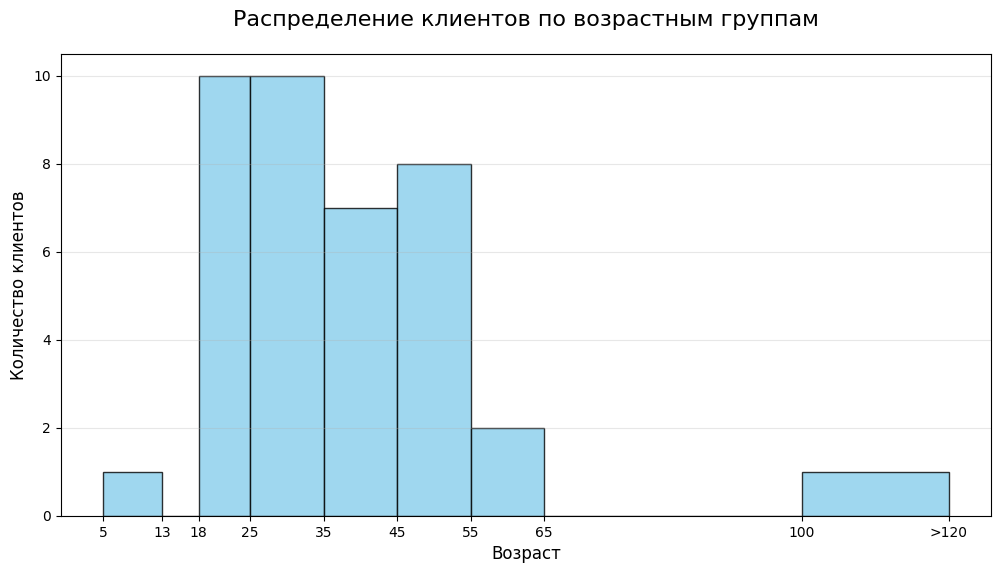

In [130]:
#Создание гистограммы с корзинами/bins
age_bins = [5, 13, 18, 25, 35, 45, 55, 65, 100, 120] #Создание корзин по возрастным группам

plt.figure(figsize=(12, 6)) #Формирование полотна на котором будет гистограмма

#Формирование гистограммы, с границами черного цвета, синими колонками и прозрачностью 0.8
plt.hist(df['age'],         
         bins=age_bins,      
         color='skyblue', 
         edgecolor='black', 
         alpha=0.8)

plt.title('Распределение клиентов по возрастным группам', fontsize=16, pad=20) #Название гистограммы с размером 16 и отступом 20
plt.xlabel('Возраст', fontsize=12) #Подпись оси x с размером 12
plt.ylabel('Количество клиентов', fontsize= 12) #Подпись оси y с размером 12
plt.grid(axis='y', alpha=0.3) #Создание линий по оси y
#Замена нижних значений на оси x на нужные возрастные категории
plt.xticks(age_bins,
           ['5','13', '18', '25', '35', '45', '55', '65', '100', '>120'],
           rotation=0)
plt.savefig('figures/Hist') #Сохранение гистограммы в нужной директории
plt.show() #Вывод гистограммы


<Figure size 1200x600 with 0 Axes>

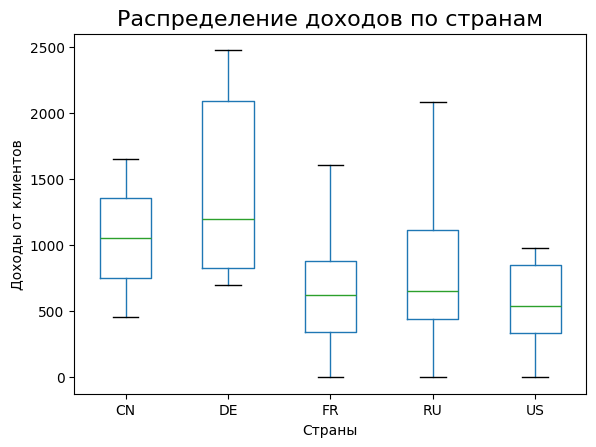

In [147]:
#Создание боксплота по доходам в разных странах
plt.figure(figsize=(12,6)) #Формирование холста
df.boxplot(column='revenue', by='country', grid=False) #Создание боксплота, который берёт за ось x страны, за ось y доходы
plt.suptitle('') #Удаление созданного pandas подзаголовка
plt.title('Распределение доходов по странам', fontsize=16) #Создание нужного заголовка
plt.xlabel('Страны')
plt.ylabel('Доходы от клиентов')
plt.savefig('figures/box') #Сохранение боксплота в нужной директории
plt.show() #Вывод боксплота


<function matplotlib.pyplot.show(close=None, block=None)>

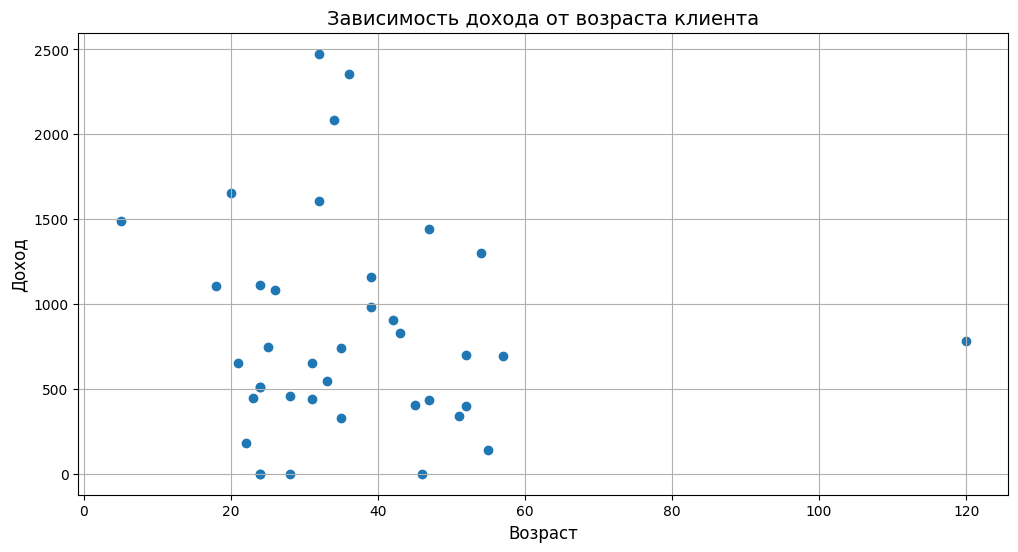

In [ ]:
#Создаем Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df['age'],df['revenue']) #Создание диаграммы рассеивания, где ось x это возраст, а ось y это доход
plt.grid() #Создаем сетку для более понятного отслеживания значений
plt.title('Зависимость дохода от возраста клиента', fontsize= 14) #Создание заголовка
plt.ylabel('Доход', fontsize= 12) #Заголовок оси y
plt.xlabel('Возраст', fontsize= 12) #Заголовок оси x
plt.tight_layout() #Подгоняем отступы и грани 
plt.savefig('figures/Scatter') #Сохранение графика как .png в нужной директории
plt.show
